In [1]:
# !pip install datasets

In [2]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from datasets import load_dataset

In [4]:
ds = load_dataset("facebook/anli")

README.md: 0.00B [00:00, ?B/s]

plain_text/train_r1-00000-of-00001.parqu(…):   0%|          | 0.00/3.14M [00:00<?, ?B/s]

plain_text/dev_r1-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r1-00000-of-00001.parque(…):   0%|          | 0.00/353k [00:00<?, ?B/s]

plain_text/train_r2-00000-of-00001.parqu(…):   0%|          | 0.00/6.53M [00:00<?, ?B/s]

plain_text/dev_r2-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r2-00000-of-00001.parque(…):   0%|          | 0.00/362k [00:00<?, ?B/s]

plain_text/train_r3-00000-of-00001.parqu(…):   0%|          | 0.00/14.3M [00:00<?, ?B/s]

plain_text/dev_r3-00000-of-00001.parquet:   0%|          | 0.00/434k [00:00<?, ?B/s]

plain_text/test_r3-00000-of-00001.parque(…):   0%|          | 0.00/435k [00:00<?, ?B/s]

Generating train_r1 split:   0%|          | 0/16946 [00:00<?, ? examples/s]

Generating dev_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r2 split:   0%|          | 0/45460 [00:00<?, ? examples/s]

Generating dev_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r3 split:   0%|          | 0/100459 [00:00<?, ? examples/s]

Generating dev_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

Generating test_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [5]:
ds

DatasetDict({
    train_r1: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 16946
    })
    dev_r1: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 1000
    })
    test_r1: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 1000
    })
    train_r2: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 45460
    })
    dev_r2: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 1000
    })
    test_r2: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 1000
    })
    train_r3: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 100459
    })
    dev_r3: Dataset({
        features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
        num_rows: 12

In [6]:
train = ds['train_r2']
dev = ds['dev_r2']
test = ds['test_r2']

In [7]:
train = train.map(lambda x: {
    'premise': x['premise'].lower(),
    'hypothesis': x['hypothesis'].lower()
})

Map:   0%|          | 0/45460 [00:00<?, ? examples/s]

In [8]:
train

Dataset({
    features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
    num_rows: 45460
})

In [9]:
for idx,sample in enumerate(train):
    print(idx," ",sample,"\n")
    if idx>=4:
        break

0   {'uid': '245475c4-6225-4f5c-b945-e13e0e988fc8', 'premise': 'topi raja sweety roja is a 1996 telugu comedy film, produced by dr. a. vijayalakshmi on sri sai madhavi productions banner and directed by dr. n. siva prasad. starring rajendra prasad, roja in the lead roles and music also composed by "hero" rajendra prasad.', 'hypothesis': 'the lead role was played by rajendra prasad', 'label': 0, 'reason': ''} 

1   {'uid': '5837ee91-4527-45b7-bd03-5f0a495d71af', 'premise': 'idris sultan (born january 1993) is a tanzanian actor and comedian, actor and radio host who won the big brother africa-hotshots in 2014. he hosts the biggest comedy news show called sio habari, he also hosts a radio show called mwb(mji wa burudani) on choicefm tanzania.', 'hypothesis': 'idris sultan was born in tanzania.', 'label': 0, 'reason': ''} 

2   {'uid': 'ed5c37ab-77c5-4dbc-ba75-8fd617b19712', 'premise': 'idris sultan (born january 1993) is a tanzanian actor and comedian, actor and radio host who won the big

<h2>EDA</h2>

<h3>All Features in Dataset</h3> 

In [10]:
print(train)

Dataset({
    features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
    num_rows: 45460
})


<h3>Data Types of Features</h3>

In [11]:
print(train.features)

{'uid': Value('string'), 'premise': Value('string'), 'hypothesis': Value('string'), 'label': ClassLabel(names=['entailment', 'neutral', 'contradiction']), 'reason': Value('string')}


In [12]:
print(train[0])

{'uid': '245475c4-6225-4f5c-b945-e13e0e988fc8', 'premise': 'topi raja sweety roja is a 1996 telugu comedy film, produced by dr. a. vijayalakshmi on sri sai madhavi productions banner and directed by dr. n. siva prasad. starring rajendra prasad, roja in the lead roles and music also composed by "hero" rajendra prasad.', 'hypothesis': 'the lead role was played by rajendra prasad', 'label': 0, 'reason': ''}


<h3>Train Shape and Labels Names</h3>

In [13]:
for split, df in {'Train': train, 'Validation': dev, 'Test': test}.items():
    print(f"\n{split} shape:", df.shape)


Train shape: (45460, 5)

Validation shape: (1000, 5)

Test shape: (1000, 5)


In [14]:
train.features['label'].names  # if label is ClassLabel type

['entailment', 'neutral', 'contradiction']

<h3>Labels Distribution</h3>

In [15]:
train.to_pandas()['label'].value_counts(normalize=True)

label
1    0.461043
0    0.317818
2    0.221139
Name: proportion, dtype: float64

<h3>Feature Lengths and Their Distribution</h3>

In [16]:
train = train.add_column('premise_len', [len(p.split()) for p in train['premise']])
train = train.add_column('hypothesis_len', [len(h.split()) for h in train['hypothesis']])

print("Average premise length:", np.mean(train['premise_len']))
print("Average hypothesis length:", np.mean(train['hypothesis_len']))

Average premise length: 53.99780026396832
Average hypothesis length: 9.95217773867136


In [17]:
df_train = train.to_pandas()
df_dev = dev.to_pandas()
df_test = test.to_pandas()

# Text length distribution
df_train['premise_len'] = df_train['premise'].str.split().apply(len)
df_train['hypothesis_len'] = df_train['hypothesis'].str.split().apply(len)

df_train[['premise_len', 'hypothesis_len']].describe()

,premise_len,hypothesis_len
count,45460.000000,45460.000000
mean,53.997800,9.952178
std,8.163158,5.335210
min,33.000000,3.000000
25%,47.000000,7.000000
50%,54.000000,9.000000
75%,60.000000,11.000000
max,76.000000,65.000000


In [18]:
df_train.isna().sum()

uid               0
premise           0
hypothesis        0
label             0
reason            0
premise_len       0
hypothesis_len    0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


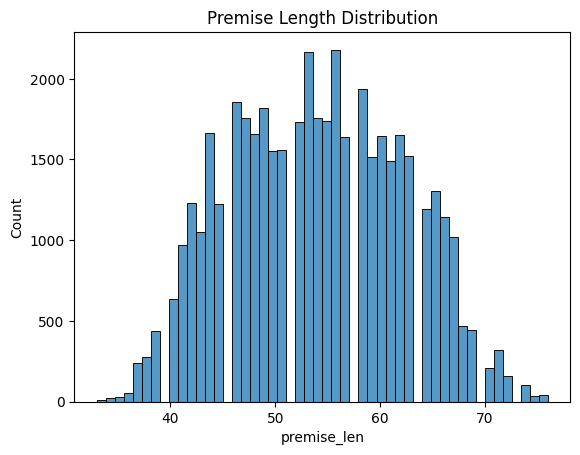

In [19]:
sns.histplot(df_train['premise_len'], bins=50)
plt.title("Premise Length Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


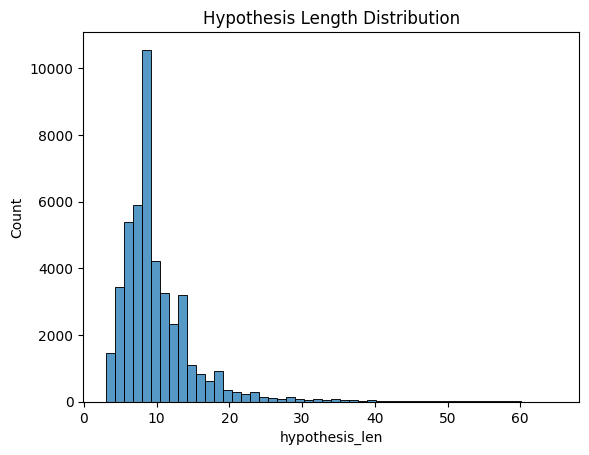

In [20]:
sns.histplot(df_train['hypothesis_len'], bins=50)
plt.title("Hypothesis Length Distribution")
plt.show()

<h3>Total Unique Words and Max Repeating Words in Datatset</h3>

In [21]:
def unique_word_count(texts):
    return len(set(" ".join(texts).split()))

print("Unique words in premise:", unique_word_count(df_train['premise']))
print("Unique words in hypothesis:", unique_word_count(df_train['hypothesis']))

Unique words in premise: 29479
Unique words in hypothesis: 32065


In [22]:
def top_words_for_label(label):
    subset = df_train[df_train['label'] == label]
    words = " ".join(subset['premise'] + " " + subset['hypothesis'])
    words = re.findall(r'\b\w+\b', words.lower())
    return Counter(words).most_common(15)

for lbl in df_train['label'].unique():
    print(f"\nTop words for label {lbl}:")
    print(top_words_for_label(lbl))


Top words for label 0:
[('the', 63226), ('in', 27052), ('and', 26553), ('of', 26380), ('a', 24138), ('is', 22546), ('was', 16446), ('by', 12227), ('to', 8902), ('on', 8518), ('it', 7685), ('for', 7238), ('s', 6965), ('as', 6755), ('an', 5447)]

Top words for label 2:
[('the', 45200), ('of', 19397), ('and', 19053), ('in', 18679), ('is', 16799), ('a', 16595), ('was', 11309), ('by', 8391), ('on', 6069), ('to', 6003), ('for', 5057), ('s', 5001), ('it', 4916), ('as', 4797), ('an', 3995)]

Top words for label 1:
[('the', 90988), ('in', 38408), ('of', 38127), ('and', 37929), ('a', 33083), ('is', 32936), ('was', 20701), ('by', 16428), ('to', 13097), ('on', 12582), ('it', 10849), ('for', 10481), ('s', 10061), ('as', 9862), ('an', 7880)]


<h3>Premise and Hypothesis similarity</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


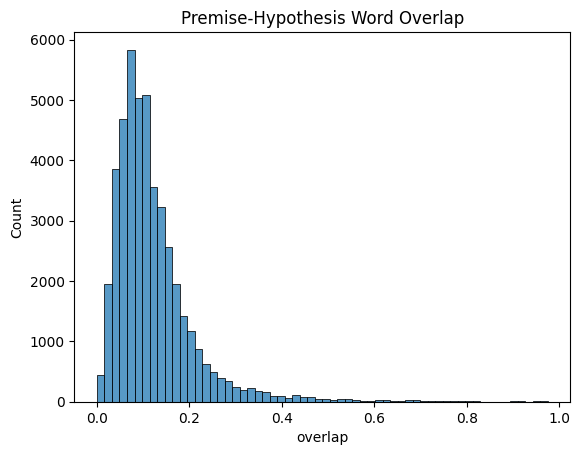

In [23]:
def jaccard_similarity(a, b):
    a_set, b_set = set(a.split()), set(b.split())
    return len(a_set & b_set) / len(a_set | b_set) if a_set | b_set else 0

df_train['overlap'] = [
    jaccard_similarity(p, h) for p, h in zip(df_train['premise'], df_train['hypothesis'])
]

sns.histplot(df_train['overlap'], bins=60)
plt.title("Premise-Hypothesis Word Overlap")
plt.show()


<h3>Understaning the reason column</h3>

In [24]:
df_train['reason_len'] = df_train['reason'].str.split().apply(lambda x: len(x))
df_train['reason'].fillna('None', inplace=True)

print("Most common reasons:")
print(df_train['reason'].value_counts().head(10))

Most common reasons:
reason
                              40599
A in the name.                    6
Starts with a J.                  4
I made it up.                     3
it is an album                    3
Movies end.                       3
Starts with a T.                  3
There is an A in the name.        2
Music has instruments.            2
No Q in the name.                 2
Name: count, dtype: int64


<h3>Detect Duplicates</h3>

In [25]:
duplicates = df_train.duplicated(subset=['premise', 'hypothesis', 'label'])
print("Duplicate samples:", duplicates.sum())

Duplicate samples: 34


<h3>Understaning similarity between Hypothesis and Premise</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

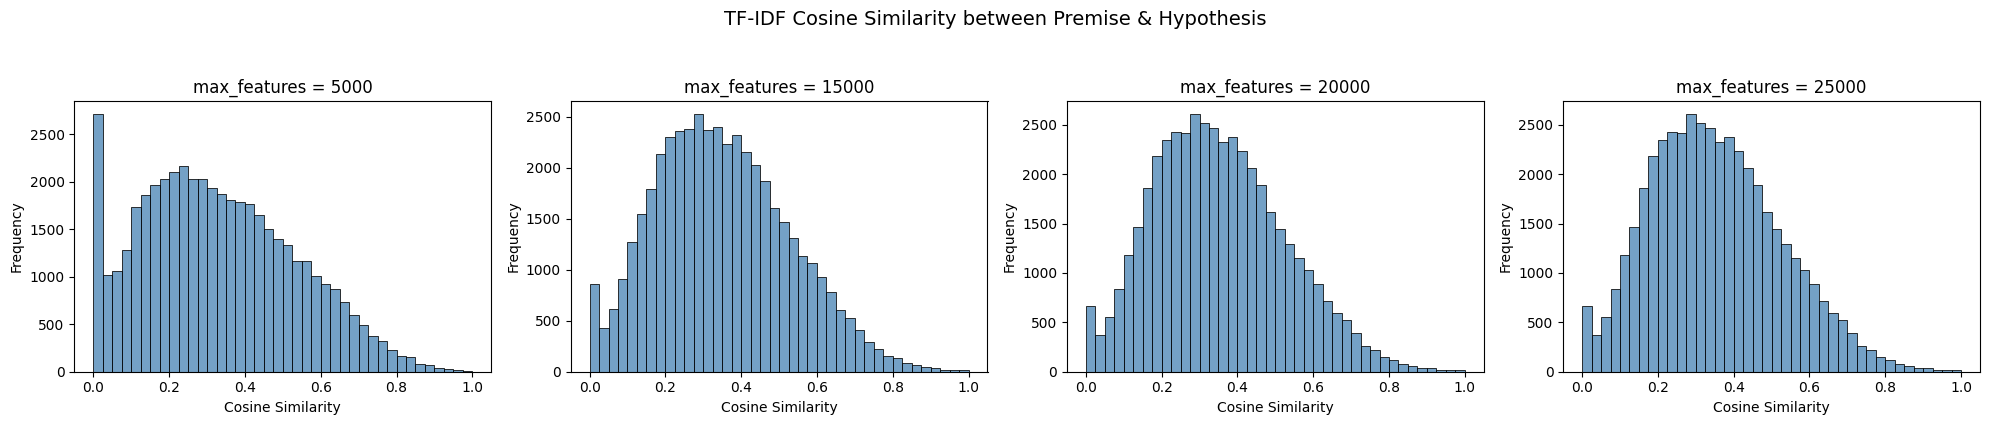

In [26]:
max_features_list = [5000, 15000, 20000, 25000]

fig, axes = plt.subplots(1, len(max_features_list), figsize=(20, 4))

for idx, max_f in enumerate(max_features_list):
    vectorizer = TfidfVectorizer(max_features=max_f)
    X = vectorizer.fit_transform(df_train['premise'])
    Y = vectorizer.transform(df_train['hypothesis'])
    
    similarities = [cosine_similarity(X[i], Y[i])[0][0] for i in range(len(df_train))]
    
    sns.histplot(similarities, bins=40, ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f"max_features = {max_f}")
    axes[idx].set_xlabel("Cosine Similarity")
    axes[idx].set_ylabel("Frequency")

plt.suptitle("TF-IDF Cosine Similarity between Premise & Hypothesis", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

<h3>Similarity Statistics by Label</h3>

In [28]:
similarity_stats = df_train.groupby('label')['overlap'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('25th_percentile', lambda x: x.quantile(0.25)),
    ('50th_percentile', lambda x: x.quantile(0.50)),
    ('75th_percentile', lambda x: x.quantile(0.75)),
    ('90th_percentile', lambda x: x.quantile(0.90)),
    ('95th_percentile', lambda x: x.quantile(0.95))
])

print("\nJaccard Similarity Statistics by Label:")
print("="*70)
print(similarity_stats)
print("\n")

label_names = {0: 'entailment', 1: 'neutral', 2: 'contradiction'}

for label in sorted(df_train['label'].unique()):
    label_name = label_names.get(label, f'Label {label}')
    stats = similarity_stats.loc[label]
    print(f"\n{label_name.upper()} (Label {label}):")
    print(f"  Mean:            {stats['mean']:.4f}")
    print(f"  Median:          {stats['median']:.4f}")
    print(f"  25th percentile: {stats['25th_percentile']:.4f}")
    print(f"  50th percentile: {stats['50th_percentile']:.4f}")
    print(f"  75th percentile: {stats['75th_percentile']:.4f}")
    print(f"  90th percentile: {stats['90th_percentile']:.4f}")
    print(f"  95th percentile: {stats['95th_percentile']:.4f}")


Jaccard Similarity Statistics by Label:
           mean    median  25th_percentile  50th_percentile  75th_percentile  \
label                                                                          
0      0.126210  0.108696         0.071429         0.108696         0.156863   
1      0.104990  0.087719         0.058824         0.087719         0.130435   
2      0.144899  0.115385         0.075472         0.115385         0.177778   

       90th_percentile  95th_percentile  
label                                    
0             0.216216         0.268293  
1             0.183673         0.230769  
2             0.279814         0.367347  



ENTAILMENT (Label 0):
  Mean:            0.1262
  Median:          0.1087
  25th percentile: 0.0714
  50th percentile: 0.1087
  75th percentile: 0.1569
  90th percentile: 0.2162
  95th percentile: 0.2683

NEUTRAL (Label 1):
  Mean:            0.1050
  Median:          0.0877
  25th percentile: 0.0588
  50th percentile: 0.0877
  75th percentile

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


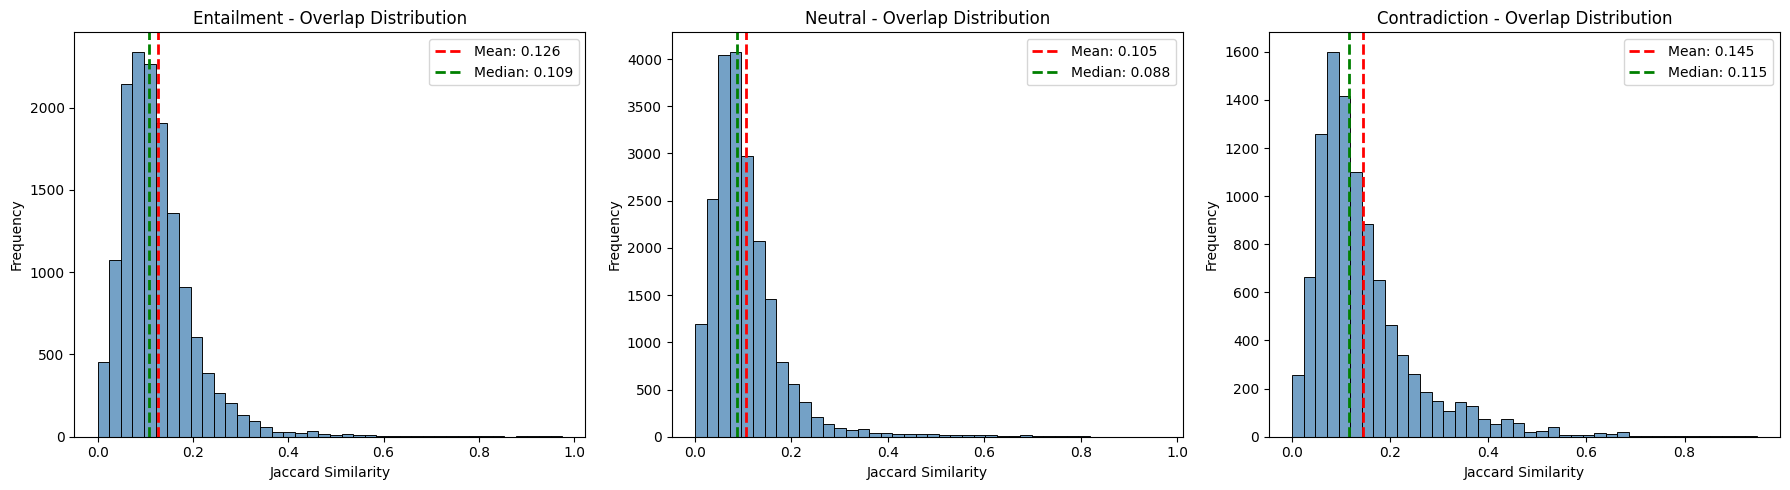

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, label in enumerate(sorted(df_train['label'].unique())):
    label_name = label_names.get(label, f'Label {label}')
    label_data = df_train[df_train['label'] == label]['overlap']
    
    sns.histplot(label_data, bins=40, ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].axvline(label_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {label_data.mean():.3f}')
    axes[idx].axvline(label_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {label_data.median():.3f}')
    axes[idx].set_title(f"{label_name.capitalize()} - Overlap Distribution")
    axes[idx].set_xlabel("Jaccard Similarity")
    axes[idx].set_ylabel("Frequency")
    axes[idx].legend()

plt.tight_layout()
plt.show()

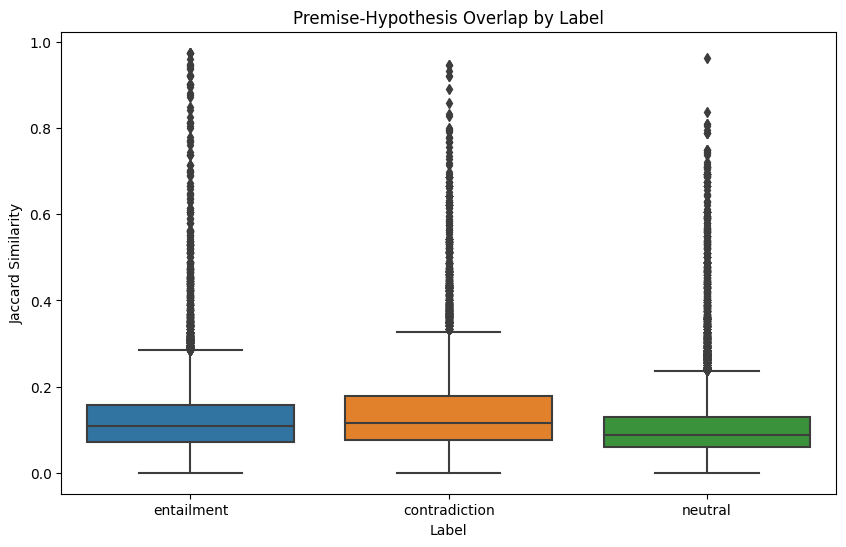

In [30]:
plt.figure(figsize=(10, 6))
df_train['label_name'] = df_train['label'].map(label_names)
sns.boxplot(data=df_train, x='label_name', y='overlap')
plt.title("Premise-Hypothesis Overlap by Label")
plt.xlabel("Label")
plt.ylabel("Jaccard Similarity")
plt.show()